# Project 2 

Train a model using Federated Learning __(FL)__, where the central server is not trusted with the raw gradients. Instead, the gradients should be moved using the __move__ command to one of the workers, sum up there, and then bring that batch back to the central server.

# Libraries

In [2]:
# Libraries
# For federated learning
import torch as T
import syft as sy
from helper_l7 import *

In [2]:
T.manual_seed(7)

In [3]:
hook = sy.TorchHook(T)

# Data set

In [4]:
X, y = generate_data(shuffle = False)

In [5]:
X.shape

torch.Size([150, 4])

# Workers

In [6]:
worker_1 = sy.VirtualWorker(hook, id = 'worker_1')
worker_2 = sy.VirtualWorker(hook, id = 'worker_2')
worker_3 = sy.VirtualWorker(hook, id = 'worker_3')
worker_4 = sy.VirtualWorker(hook, id = 'worker_4')
worker_5 = sy.VirtualWorker(hook, id = 'worker_5')

# Split data

In [7]:
x1 = X[0:38].send(worker_1)
y1 = y[0:38].send(worker_1)

x2 = X[38:76].send(worker_2)
y2 = y[38:76].send(worker_2)

x3 = X[76:114].send(worker_3)
y3 = y[76:114].send(worker_3)

x4 = X[114:150].send(worker_4)
y4 = y[114:150].send(worker_4)

# Model

In [8]:
server_model = Net()

# Training

In [9]:
# set hyper-parameters
lr = 1e-2

In [11]:
epochs = 300
server_model, loss_training, worker_1_loss, worker_2_loss, worker_3_loss, worker_4_loss = federated_avg_training(epochs, lr, worker_1, worker_2, worker_3, 
                                                                                                                 worker_4, worker_5, x1, y1, x2, y2, x3, y3, x4, y4)

Main model updated!
Epoch: 0|300 Avg loss: 1.080461025238037
Main model updated!
Epoch: 1|300 Avg loss: 1.0757756233215332
Main model updated!
Epoch: 2|300 Avg loss: 1.0711289644241333
Main model updated!
Epoch: 3|300 Avg loss: 1.066522240638733
Main model updated!
Epoch: 4|300 Avg loss: 1.061943531036377
Main model updated!
Epoch: 5|300 Avg loss: 1.0573861598968506
Main model updated!
Epoch: 6|300 Avg loss: 1.0528634786605835
Main model updated!
Epoch: 7|300 Avg loss: 1.0483622550964355
Main model updated!
Epoch: 8|300 Avg loss: 1.0438867807388306
Main model updated!
Epoch: 9|300 Avg loss: 1.0394412279129028
Main model updated!
Epoch: 10|300 Avg loss: 1.0350167751312256
Main model updated!
Epoch: 11|300 Avg loss: 1.0306164026260376
Main model updated!
Epoch: 12|300 Avg loss: 1.0262346267700195
Main model updated!
Epoch: 13|300 Avg loss: 1.0218682289123535
Main model updated!
Epoch: 14|300 Avg loss: 1.0175154209136963
Main model updated!
Epoch: 15|300 Avg loss: 1.0131750106811523
Main 

In [12]:
server_model

Net(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=3, bias=True)
)

In [13]:
losses = [loss_training, worker_1_loss, worker_2_loss, worker_3_loss, worker_4_loss]

# Training plot

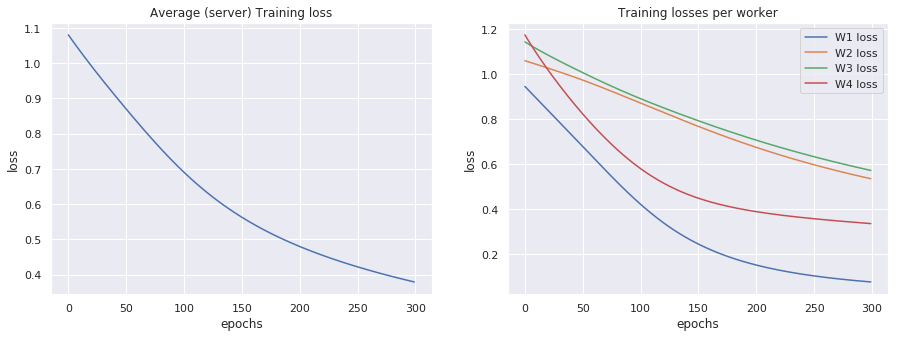

In [14]:
plot_losses(epochs, losses, 'plot', True)

# Evaluation

In [15]:
eval_model(server_model, X, y)

Training accuracy: 0.8733333333333333


# Conclusion

Federated Learning is a technique, which allow us to train a model across different users, without compromising their privacy. In this project, I implemented federated learning using a set of workers. In the context of DP, the workers represent the remote users. This users will have local data, in which we would like to train on. However, even if we send a copy of the main model to the users, it is still possible to see their data using a leak. This leak, involve the use of the raw gradients. These gradients contain the user data. Therefore, in order to add an extra security layer, we can apply an aggregator. This aggregator will compute the averaged from the gradients. Then, in the server we will receive the averaged gradients. This ensures that, we are not seeking at the actual gradients.

In [ ]:
# Note: The helper function will be uploaded at the culmination of the challenge